<a href="https://colab.research.google.com/github/alfino02/flowerclassification/blob/main/CNN_flowers_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
print(os.listdir("/content/drive/MyDrive/dataset/flowers"))
train_dir = "/content/drive/MyDrive/dataset/flowers"

['dandelion', 'daisy', 'tulip']


In [ ]:
from google.colab import files
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing import image
from keras.callbacks import ReduceLROnPlateau

# Preprocessing

In [ ]:
train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=20,
                horizontal_flip=True,
                shear_range = 0.2,
                fill_mode = 'nearest',
                validation_split=0.4)

validation_datagen = ImageDataGenerator(rescale = 1.0/255,
                                        validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(100,150),
        batch_size=64,
        class_mode='categorical',
        subset='training')

validation_generator = validation_datagen.flow_from_directory(
        train_dir,
        target_size=(100,150),
        batch_size=64,
        class_mode='categorical',
        subset='validation')

Found 1682 images belonging to 3 classes.
Found 1118 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.000003)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    # epochs=10,
    epochs=25,
    validation_data=validation_generator,
    callbacks=[learning_rate_reduction])

Epoch 1/25
27/27 [==============================] - 524s 20s/step - loss: 1.0037 - accuracy: 0.4982 - val_loss: 0.9525 - val_accuracy: 0.5242 - lr: 0.0010
Epoch 2/25
27/27 [==============================] - 57s 2s/step - loss: 0.8643 - accuracy: 0.5910 - val_loss: 0.8876 - val_accuracy: 0.5689 - lr: 0.0010
Epoch 3/25
27/27 [==============================] - 46s 2s/step - loss: 0.7860 - accuracy: 0.6373 - val_loss: 0.8402 - val_accuracy: 0.6449 - lr: 0.0010
Epoch 4/25
27/27 [==============================] - 56s 2s/step - loss: 0.7503 - accuracy: 0.6587 - val_loss: 0.8585 - val_accuracy: 0.5903 - lr: 0.0010
Epoch 5/25
27/27 [==============================] - ETA: 0s - loss: 0.7535 - accuracy: 0.6546
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
27/27 [==============================] - 47s 2s/step - loss: 0.7535 - accuracy: 0.6546 - val_loss: 0.8129 - val_accuracy: 0.6234 - lr: 0.0010
Epoch 6/25
27/27 [==============================] - 56s 2s/step - loss: 0.

In [ ]:
def eval_plot(history):

  plt.figure(figsize=(14, 5))

  # Accuracy plot
  plt.subplot(1, 2, 1)
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  acc_plot, = plt.plot(epochs, acc, 'r')
  val_acc_plot, = plt.plot(epochs, val_acc, 'b')
  plt.title('Training and Validation Accuracy')
  plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])

  # Loss plot
  plt.subplot(1, 2, 2)
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  loss_plot, = plt.plot(epochs, loss, 'r')
  val_loss_plot, = plt.plot(epochs, val_loss, 'b')
  plt.title('Training and Validation Loss')
  plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])

In [ ]:
def evaluate(model):

  validation_generator = train_datagen.flow_from_directory(
          train_dir,
          target_size=(100,150),
          batch_size=32,
          class_mode='categorical',
          shuffle = False,
          subset='validation')

  batch_size = 32
  num_of_test_samples = len(validation_generator.filenames)

  Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)
  y_pred = np.argmax(Y_pred, axis=1)

  print('\nConfusion Matrix\n')
  print(confusion_matrix(validation_generator.classes, y_pred))


  print('\n\nClassification Report\n')
  target_names = ['Dandelion', 'Daisy', 'Tulip']
  print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Found 1118 images belonging to 3 classes.


<ipython-input-9-fe05f765767c>:14: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)



Confusion Matrix

[[ 41 253  11]
 [  3 410   7]
 [ 14 157 222]]


Classification Report

              precision    recall  f1-score   support

   Dandelion       0.71      0.13      0.23       305
       Daisy       0.50      0.98      0.66       420
       Tulip       0.93      0.56      0.70       393

    accuracy                           0.60      1118
   macro avg       0.71      0.56      0.53      1118
weighted avg       0.71      0.60      0.56      1118



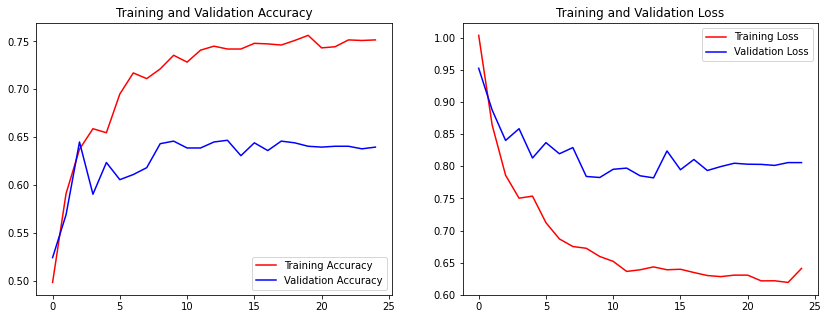

In [ ]:
eval_plot(history)
evaluate(model)

In [ ]:
def predict_image(image_upload, model = model):
  im = image_upload
  im_array = np.asarray(im)
  im_array = im_array*(1/225)
  im_input = tf.reshape(im_array, shape = [1, 100, 150, 3])

  predict_proba = sorted(model.predict(im_input)[0])[2]
  predict_class = np.argmax(model.predict(im_input))

  if predict_class == 0:
      predict_label = 'Daisy'
  elif predict_class == 1:
      predict_label = 'Dandelion'
  elif predict_class == 2:
      predict_label = 'Tulip'
  else:
    predict_label = 'Tidak Teridentifikasi'

  print('\n')
  plt.show()
  print("\nImage prediction result: ", predict_label)
  print("Probability: ", round(predict_proba*100,2), "%")
  print('\n')

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  img = np.vstack([x])

predict_image(img)

Saving tulip_coba.jpg to tulip_coba.jpg


AttributeError: ignored